In [1]:
#Importing Libraries needed to run ANN model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale, normalize
import seaborn as sn
import datetime
%matplotlib inline

In [2]:
#Importing machine learning library

import tensorflow as ts

In [3]:
#Importing machine learning library

from tensorflow import keras

In [4]:
#Creating file path to read file

csv_file_path ='Table2014_2023F.csv'

In [5]:
#Reading the csv file with reduced features and ready for the model and assigning variable name

Table=pd.read_csv(csv_file_path)

In [6]:
#Checking tablle attributes

Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157338 entries, 0 to 157337
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATETIME                        157338 non-null  object 
 1   System Buy Price(GBP/MWh)       157338 non-null  float64
 2   Market Index Price (£/MWh)      157338 non-null  float64
 3   Market Index Volume (MWh)       157338 non-null  float64
 4   Settlement Period               157338 non-null  int64  
 5   National demand (MW)            157338 non-null  float64
 6   Embbeded wind generation (MW)   157338 non-null  float64
 7   Embbeded solar generation (MW)  157338 non-null  float64
 8   Total system demand (MW)        157338 non-null  float64
 9   Wind generation (MW)            157338 non-null  float64
 10  Solar generation (MW)           157338 non-null  float64
 11  Hydro generation (MW)           157338 non-null  float64
 12  Biomass generati

In [7]:
#Creating a for loop to convert all columns from float64 to float32, to help machine handling computation

columns_to_convert=['National demand (MW)','Solar generation (MW)','Embbeded solar generation (MW)','Embbeded wind generation (MW)','Total system demand (MW)','Market Index Volume (MWh)','Market Index Price (£/MWh)','System Buy Price(GBP/MWh)','Wind generation (MW)','Hydro generation (MW)','Biomass generation (MW)']
for column in columns_to_convert:
  Table[column]=pd.to_numeric(Table[column],errors='coerce').astype('float32')

In [8]:
#Checking if the columns were converted successfully

Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157338 entries, 0 to 157337
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DATETIME                        157338 non-null  object 
 1   System Buy Price(GBP/MWh)       157338 non-null  float32
 2   Market Index Price (£/MWh)      157338 non-null  float32
 3   Market Index Volume (MWh)       157338 non-null  float32
 4   Settlement Period               157338 non-null  int64  
 5   National demand (MW)            157338 non-null  float32
 6   Embbeded wind generation (MW)   157338 non-null  float32
 7   Embbeded solar generation (MW)  157338 non-null  float32
 8   Total system demand (MW)        157338 non-null  float32
 9   Wind generation (MW)            157338 non-null  float32
 10  Solar generation (MW)           157338 non-null  float32
 11  Hydro generation (MW)           157338 non-null  float32
 12  Biomass generati

In [9]:
#Choosing time range start and end

sd_start= ('2022-01-01 00:00:00')
sd_end= ('2023-01-01 23:30:00')

In [10]:
#Selecting data within the time range defined above using the column that has datetime

Table2=Table[(Table['DATETIME'] >= sd_start) & (Table['DATETIME']<= sd_end)]

In [11]:
#Checking if there are null values within the data

mask=Table2.isnull()
num_nan_per_coll= mask.sum()
print("Number of NaN values per column:")
print(num_nan_per_coll)

Number of NaN values per column:
DATETIME                          0
System Buy Price(GBP/MWh)         0
Market Index Price (£/MWh)        0
Market Index Volume (MWh)         0
Settlement Period                 0
National demand (MW)              0
Embbeded wind generation (MW)     0
Embbeded solar generation (MW)    0
Total system demand (MW)          0
Wind generation (MW)              0
Solar generation (MW)             0
Hydro generation (MW)             0
Biomass generation (MW)           0
dtype: int64


In [12]:
#Visualizing statistical summary of each variable

Table2.describe()

,System Buy Price(GBP/MWh),Market Index Price (£/MWh),Market Index Volume (MWh),Settlement Period,National demand (MW),Embbeded wind generation (MW),Embbeded solar generation (MW),Total system demand (MW),Wind generation (MW),Solar generation (MW),Hydro generation (MW),Biomass generation (MW)
count,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000
mean,201.712860,198.700211,1230.403076,24.497374,26627.001953,1779.526855,1442.699829,29723.833984,8810.000977,1451.827271,380.227722,1710.817383
std,146.391190,106.404869,482.886658,13.852404,6128.827637,1062.616699,2193.916504,5316.230957,5206.282227,2201.882568,234.319046,709.269043
min,0.000000,0.000000,0.000000,1.000000,14879.000000,201.000000,0.000000,17295.000000,371.000000,0.000000,0.000000,0.000000
25%,116.469999,131.225002,878.987518,12.250000,21842.250000,916.000000,0.000000,25654.500000,4290.250000,0.000000,186.000000,1248.250000
50%,182.000000,179.699997,1190.424988,24.000000,25933.000000,1546.000000,6.000000,29060.000000,8086.000000,6.000000,343.000000,1845.000000
75%,259.000000,246.787495,1534.612518,36.000000,30218.000000,2469.750000,2455.750000,32902.000000,13174.750000,2474.000000,527.000000,2156.000000
max,4035.979980,1561.589966,3658.649902,48.000000,46147.000000,5072.000000,9481.000000,47117.000000,20912.000000,9468.000000,1181.000000,3262.000000


In [13]:
#Calling additional needed libraries to run the model

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separating the features and target variable
features = Table2[['System Buy Price(GBP/MWh)','Market Index Volume (MWh)','Embbeded wind generation (MW)','Embbeded solar generation (MW)','Total system demand (MW)','Wind generation (MW)','Biomass generation (MW)','Solar generation (MW)','Hydro generation (MW)']]
target = Table2['Market Index Price (£/MWh)']

# Performing data preprocessing
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Defining the model architecture
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=20, batch_size=12, verbose=1)

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')

Epoch 1/20
1168/1168 [==============================] - 7s 5ms/step - loss: 20558.3223
Epoch 2/20
1168/1168 [==============================] - 5s 4ms/step - loss: 9276.6826
Epoch 3/20
1168/1168 [==============================] - 3s 3ms/step - loss: 7894.3906
Epoch 4/20
1168/1168 [==============================] - 8s 7ms/step - loss: 7287.3765
Epoch 5/20
1168/1168 [==============================] - 12s 10ms/step - loss: 6803.5435
Epoch 6/20
1168/1168 [==============================] - 9s 8ms/step - loss: 6322.5283
Epoch 7/20
1168/1168 [==============================] - 7s 6ms/step - loss: 5860.0181
Epoch 8/20
1168/1168 [==============================] - 7s 6ms/step - loss: 5511.2979
Epoch 9/20
1168/1168 [==============================] - 4s 3ms/step - loss: 5300.3218
Epoch 10/20
1168/1168 [==============================] - 5s 4ms/step - loss: 5211.5854
Epoch 11/20
1168/1168 [==============================] - 7s 6ms/step - loss: 5169.1641
Epoch 12/20
1168/1168 [==========================

In [14]:
# Making predictions
predictions = model.predict(X_test)

110/110 [==============================] - 1s 7ms/step


In [15]:
#Printing the predicted values to check for irregularities

print(predictions)

[[121.902084]
 [226.72527 ]
 [150.06824 ]
 ...
 [240.29227 ]
 [141.11499 ]
 [255.54382 ]]


In [16]:
#Checking max of predictions to help set plot range

max(predictions)

array([1306.7982], dtype=float32)

In [17]:
#Transforming the prediction array of 2d to one dimension for plotting

predictions1= predictions.reshape(-1)

In [18]:
#Importing library to calculate evalution metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculating evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) score: {r2}')

Mean Squared Error (MSE): 5034.04443359375
Root Mean Squared Error (RMSE): 70.95100402832031
Mean Absolute Error (MAE): 52.77355194091797
R-squared (R2) score: 0.5660565402882599


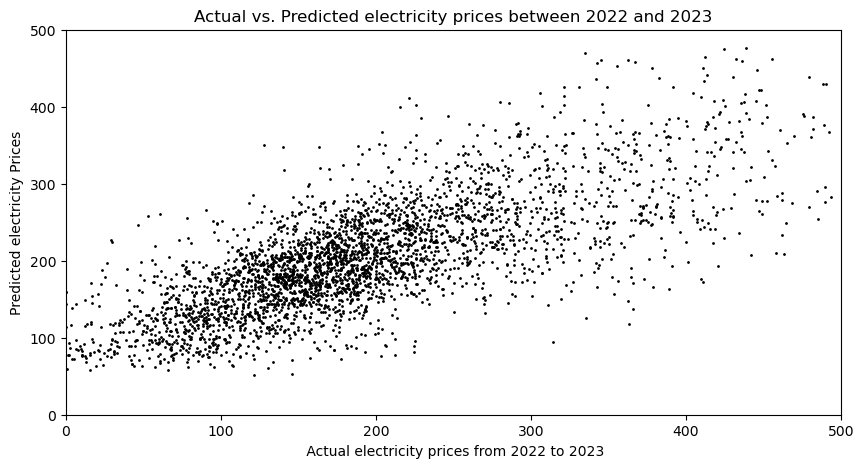

<Figure size 640x480 with 0 Axes>

In [27]:
#Importing library to plot results
import matplotlib.pyplot as plt

# Plot of predicted vs. actual prices
plt.figure(figsize=(10, 5))
plt.grid(False)
plt.scatter(y_test, predictions,color='black',s=1)
plt.xlabel(' Actual electricity prices from 2022 to 2023')
plt.ylabel('Predicted electricity Prices')
plt.title('Actual vs. Predicted electricity prices between 2022 and 2023')
min_val = 0  # Replace with the minimum value you want to set for both x and y axes
max_val = 500  # Replace with the maximum value you want to set for both x and y axes
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.show()
plt.savefig("random.jpg", facecolor="k")

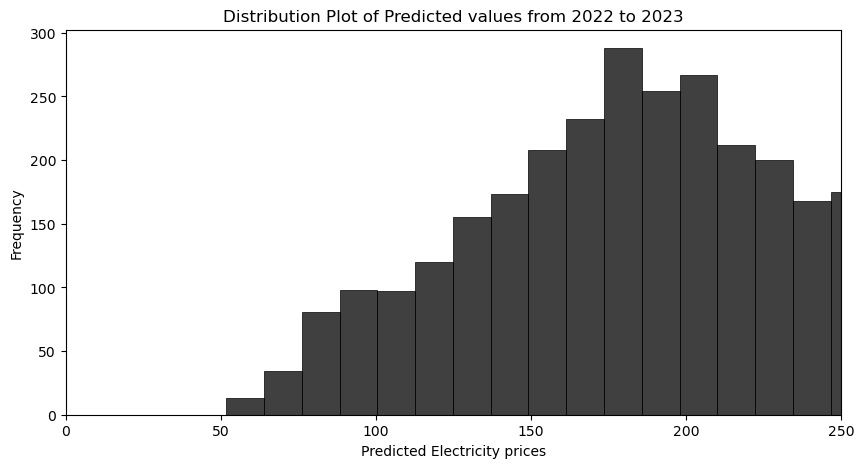

<Figure size 640x480 with 0 Axes>

In [20]:
#Potting distribution of predition

plt.figure(figsize=(10, 5))
sn.histplot(predictions1, color='black')
plt.title('Distribution Plot of Predicted values from 2022 to 2023')
plt.xlabel('Predicted Electricity prices')
plt.ylabel('Frequency')
plt.xlim(min_val, max_val)
min_val = 0  # Replace with the minimum value you want to set for both x and y axes
max_val =1350 # Replace with the maximum value you want to set for both x and y axes
plt.show()
plt.savefig('distribution_plot.png')

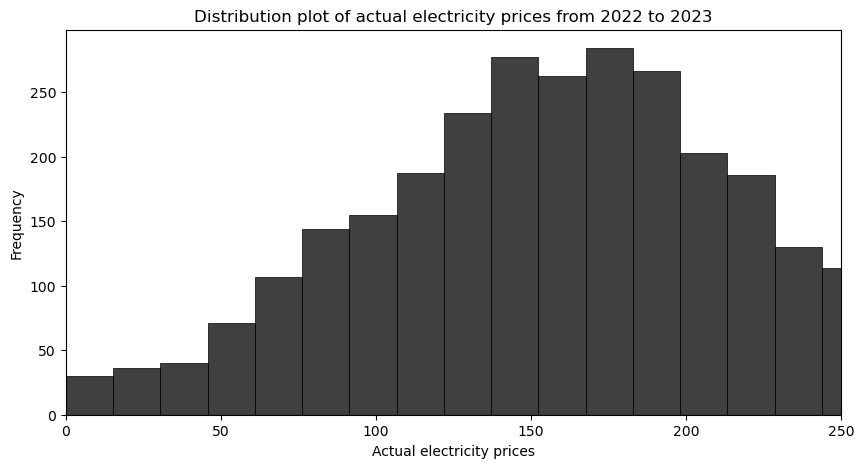

In [21]:
#Plotting distribution of actual values

plt.figure(figsize=(10, 5))
sn.histplot(y_test, color='black')
plt.grid(False)
min_val = 0  # Replace with the minimum value you want to set for both x and y axes
max_val =250  # Replace with the maximum value you want to set for both x and y axes
plt.xlim(min_val, max_val)
plt.title('Distribution plot of actual electricity prices from 2022 to 2023')
plt.xlabel('Actual electricity prices')
plt.ylabel('Frequency')
plt.savefig('distribution_plot.png')
plt.show()

In [22]:
# Calculating the residuals
residuals =y_test -predictions.flatten()

# Displaying the residuals
print("Residuals:")

Residuals:


In [23]:
# Getting the weights of the first layer
weights_layer1 = model.get_weights()[0]

# Calculating feature importance by summing the absolute weights for each feature
feature_importance = np.sum(np.abs(weights_layer1), axis=0)

# Printing feature importance scores
for i, importance in enumerate(feature_importance):
    print(f'Feature {i+1} Importance: {importance}')

Feature 1 Importance: 8.5875244140625
Feature 2 Importance: 7.100378513336182
Feature 3 Importance: 6.925412178039551
Feature 4 Importance: 5.842125415802002
Feature 5 Importance: 7.582921028137207
Feature 6 Importance: 7.134810447692871
Feature 7 Importance: 6.408341884613037
Feature 8 Importance: 2.6766836643218994
Feature 9 Importance: 2.7692360877990723
